## Importing the packages

In [93]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Training data taken from years 2014 to 2018

In [70]:
NFLX = DataReader('NFLX',  'yahoo', datetime(2014,1,1), datetime(2018,12,31));

In [72]:
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,52.511429,51.542858,52.401428,51.831429,12325600.0,51.831429
2014-01-03,52.495716,51.842857,52.000000,51.871429,10817100.0,51.871429
2014-01-06,52.044285,50.475716,51.889999,51.367142,15501500.0,51.367142
2014-01-07,49.698570,48.152859,49.684284,48.500000,36167600.0,48.500000
2014-01-08,49.425713,48.074287,48.104286,48.712856,20001100.0,48.712856


### Populating the data

In [73]:
#taking the 'Open' column
train_set = NFLX.iloc[:,2:3].values

#feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

#creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [74]:
X_train.shape

(1198, 60, 1)

### Building the network

In [75]:
#Initializing the RNN
regressor = Sequential()

In [76]:
#Adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [77]:
#Adding a second LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [78]:
#Adding a third LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [79]:
#Adding a fourth LSTM layer and some dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [80]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [81]:
#Compliling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [82]:
#Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/sample - loss: 0.0282 0s - loss: 0.02
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0035
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/sample - loss: 0.0033
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0034
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0028
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0031
Epoch 7/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0025
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0024
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0022
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0024
Epoch 12/100
1198/1198 [===========

1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0012ET
Epoch 94/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0013
Epoch 95/100
1198/1198 [==============================] - 7s 5ms/sample - loss: 0.0011
Epoch 96/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 9.4149e-04
Epoch 97/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0012 0s - loss: 0
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 9.9259e-04 1s - loss
Epoch 99/100
1198/1198 [==============================] - 7s 5ms/sample - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 7s 5ms/sample - loss: 0.0012


### Testing the model on the test dataset of Year 2019

In [83]:
NFLX_new = DataReader('NFLX',  'yahoo', datetime(2019,1,1), datetime(2019,12,31));

In [84]:
real_stock_price = NFLX_new.iloc[:, 2:3].values

In [85]:
NFLX_new.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989


In [86]:
dataset_total = pd.concat((NFLX['Open'], NFLX_new['Open']), axis = 0)

In [87]:
inputs = dataset_total[len(dataset_total) - len(NFLX_new) - 60:].values

In [88]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 312):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Predicting the test data

In [89]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Plotting the predictions

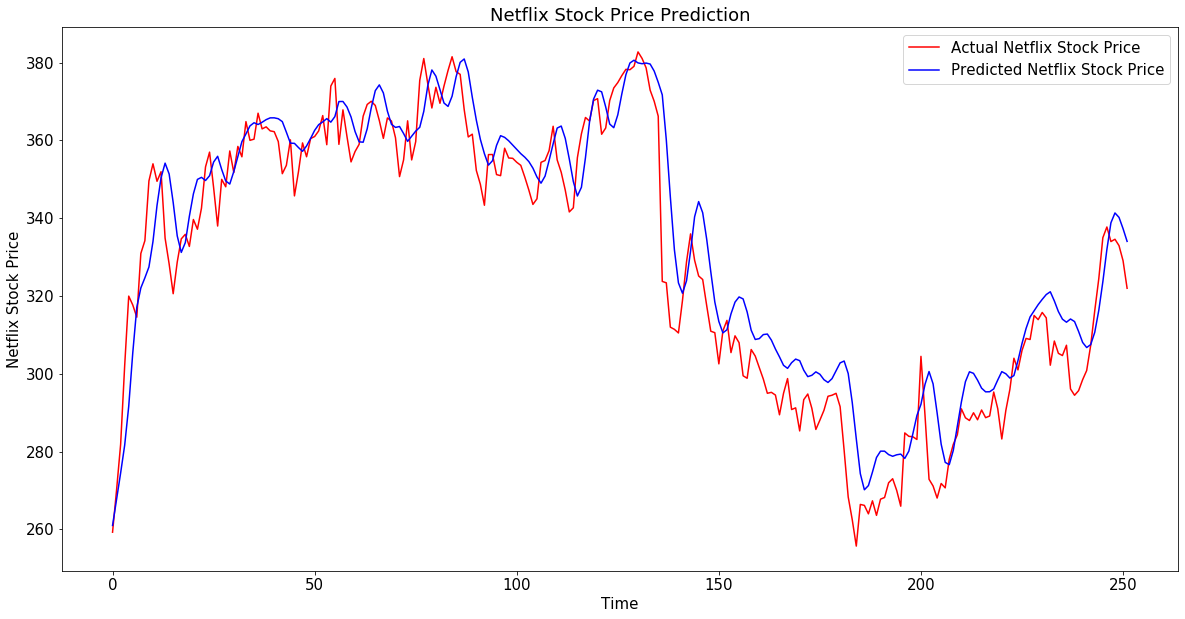

In [90]:
plt.figure(figsize=(20,10))
font = {'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
plt.plot(real_stock_price, color = 'red', label = 'Actual Netflix Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

## Evaluating the model

In [103]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
mape = mean_absolute_percentage_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)

In [101]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [104]:
print('rmse:{} mape:{} r2:{}'.format(rmse,mape,r2))

rmse:11.085776026396147 mape:2.70651401248984 r2:0.8982437056999801
